## **SpineScope Project - Jackie Vescio**

**Contribution:** Exploratory Data Analysis (EDA) and Feature Insights  
**License:** SuperDataScience Community Project (shared contributions)  
**Author:** Jackie Vescio (2025)


**Note: This notebook assumes the raw dataset is loaded.**
**If using a cleaned dataset, skip capping/clipping code cells.** 

In [1]:
# EDA: SpineScope Project - Jackie Vescio

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("column_2C_weka.csv")

# Preview the data
df.head()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


### Number of rows and columns

In [2]:
# This tells the number of rows and columns
df.shape

(310, 7)

### Column Names, Data Types, and Missing Values (if any)

In [3]:
# This shows column names, data types, and missing values (if any).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### Statistical Info - Mean, Std Deviation, Min, Max For Each Numerical Column

In [4]:
df.describe()	 

# This provides stats like mean, std deviation, min, max for each numerical column. 

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### Number of Patients Classified as Normal vs Abnormal

In [5]:
df['class'].value_counts() 

# This will tell you how many patients are classified as Normal vs Abnormal. 

class
Abnormal    210
Normal      100
Name: count, dtype: int64

### Histogram of Biomechanical Features

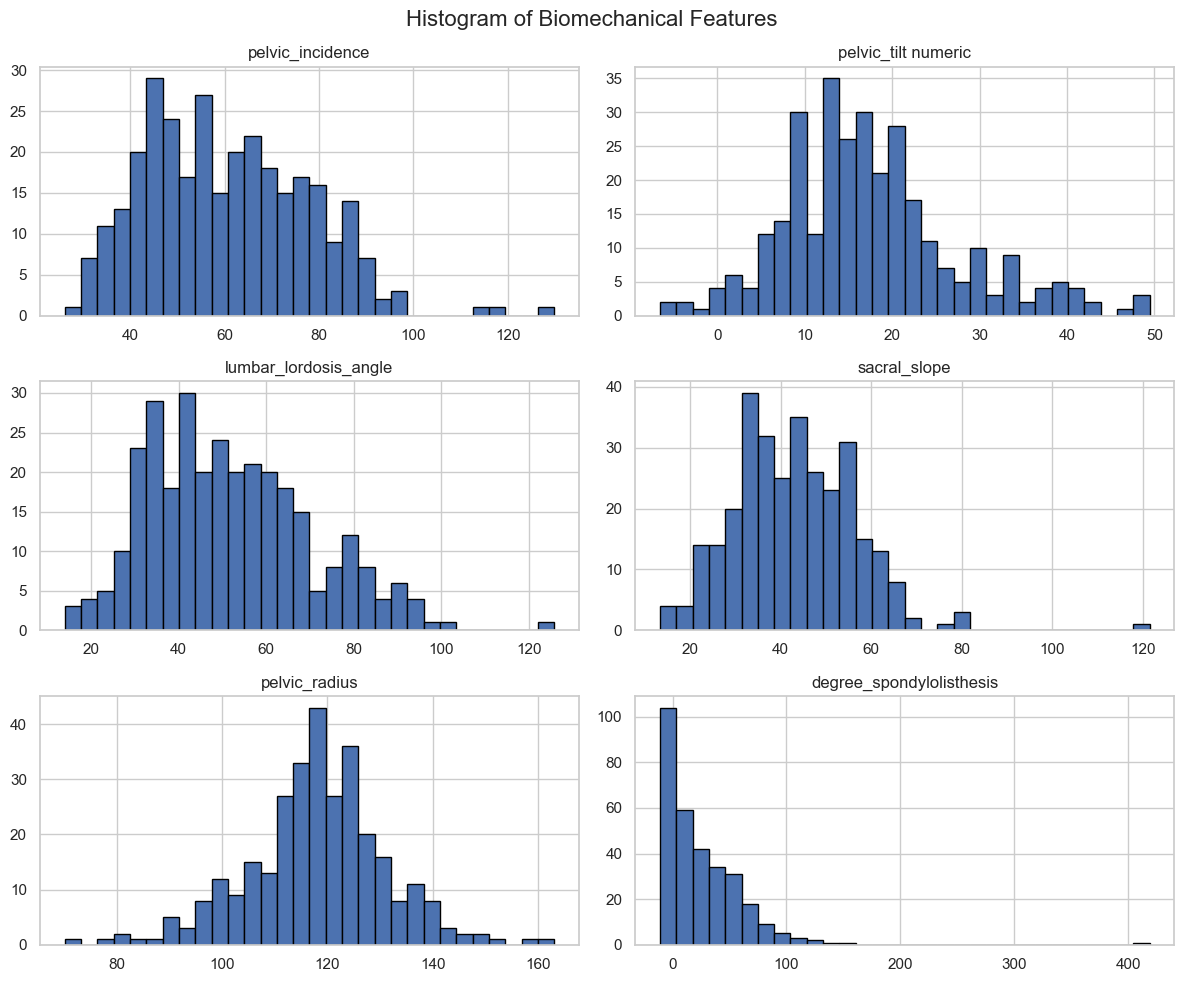

In [6]:
# Plot histograms for all numeric columns
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histogram of Biomechanical Features', fontsize=16)
plt.tight_layout()
plt.show()


## Histogram Summary of Biomechanical Features

- **pelvic_incidence**: Slight right skew; some high outliers above 100.
- **pelvic_tilt numeric**: Approximately normal distribution; no clear outliers.
- **lumbar_lordosis_angle**: Slight right skew; one noticeable outlier >120.
- **sacral_slope**: Approximately normal; one high outlier >120.
- **pelvic_radius**: Roughly normal distribution; no major outliers.
- **degree_spondylolisthesis**: Strong right skew; extreme outlier >400.

### Insights:
- Features like degree_spondylolisthesis show strong skew and extreme values, which may need special handling (e.g., transformation or outlier treatment) before modeling.
- Other features are mostly normally distributed, which simplifies modeling.


### Boxplots of Biomechanical Features

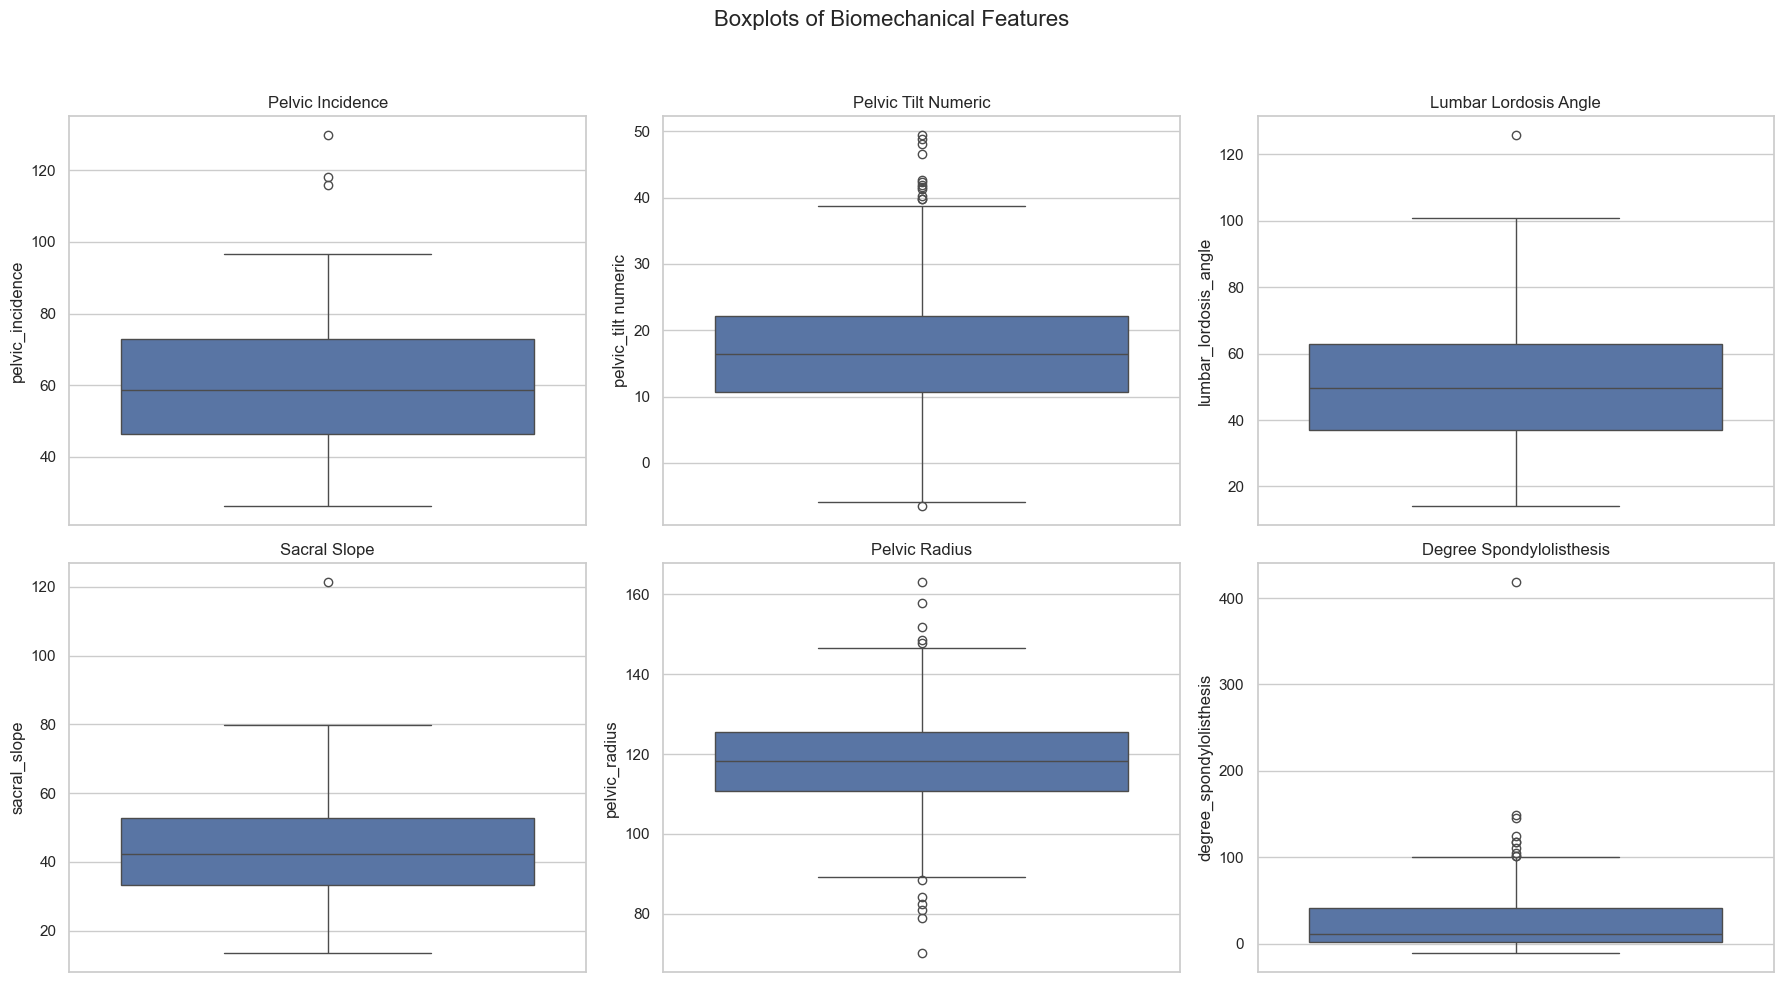

In [7]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Biomechanical Features", fontsize=16)

# Feature list
features = [
    "pelvic_incidence",
    "pelvic_tilt numeric",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis"
]

# Plot each boxplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, y=feature, ax=axs[row][col])
    axs[row][col].set_title(feature.replace("_", " ").title())

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

### Boxplots Summary of Biomechanical Features

- **pelvic_incidence**: Mostly symmetric distribution, some high outliers.
- **pelvic_tilt numeric**: Fairly symmetric, no extreme outliers.
- **lumbar_lordosis_angle**: Right-skewed with one notable high outlier.
- **sacral_slope**: Mostly symmetric, single high outlier.
- **pelvic_radius**: Consistent distribution, no significant outliers.
- **degree_spondylolisthesis**: Strong right skew; one extreme outlier far above 400.

### Insights:
- Boxplots confirm what was seen in the histograms: degree_spondylolisthesis has extreme values and a highly skewed distribution.
- Most other features have mild skew or are fairly symmetric, suggesting they are well-behaved for modeling.
- Outliers, especially in degree_spondylolisthesis, may impact models sensitive to extreme values (like regression) and should be considered for capping, transformation, or robust methods.


### Boxplots of Biomechanical Features by Class

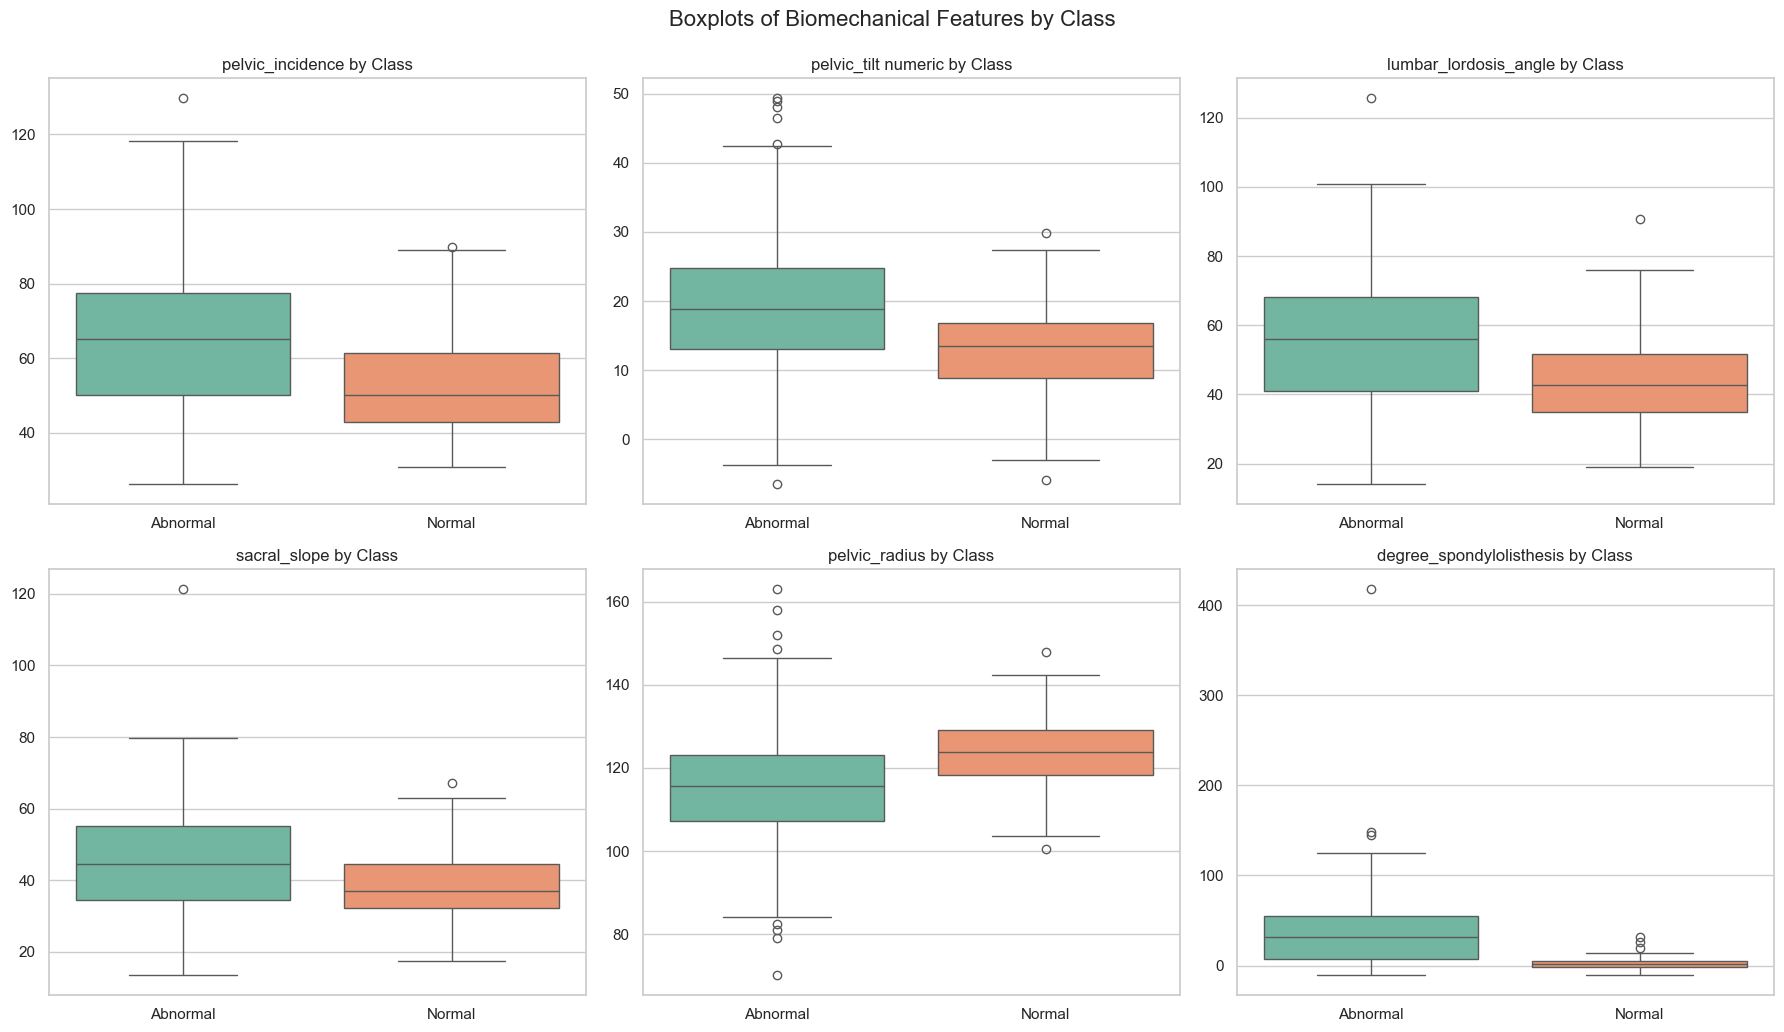

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare Feature Distributions by Class Using Boxplots
# This will show how each biomechanical feature differs between the two patient classes: Normal vs Abnormal. 
# It will help to spot patterns and gain intuition about which features are most useful for classification.

# Suppress all warnings (just for cleaner output)
import warnings
warnings.filterwarnings("ignore")

# Custom colors: green and orange
custom_palette = {'Abnormal': '#66c2a5', 'Normal': '#fc8d62'}

# Features to plot
features = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Plot
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='class', y=feature, hue='class',
                palette=custom_palette, legend=False)
    plt.title(f'{feature} by Class')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Boxplots of Biomechanical Features by Class', fontsize=16, y=1.03)
plt.show()

### Boxplots Summary: Comparing Feature Distributions by Class

- **pelvic_incidence**: Abnormal group shows higher median and wider spread.
- **pelvic_tilt numeric**: Abnormal class has higher values and slightly more variability.
- **lumbar_lordosis_angle**: Abnormal patients display larger angles and more spread.
- **sacral_slope**: Higher median in Abnormal group, but some overlap with Normal.
- **pelvic_radius**: Similar distributions between Normal and Abnormal; minor differences.
- **degree_spondylolisthesis**: Huge separation between classes — Abnormal group has much higher values and outliers.

### Insights:
- Several features (e.g., pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis) show clear differences between Normal and Abnormal classes, making them strong candidate predictors.
- pelvic_radius shows minimal class difference and may be less informative.
- Degree_spondylolisthesis stands out with the largest class separation, suggesting it will likely be a key feature for classification.


### Correlation Heatmap

- We generate a correlation matrix heatmap to see how the biomechanical features relate to each other – this can highlight strong relationships (positive or negative).  

- High correlations may suggest redundancy (which we might handle during feature selection or PCA). 

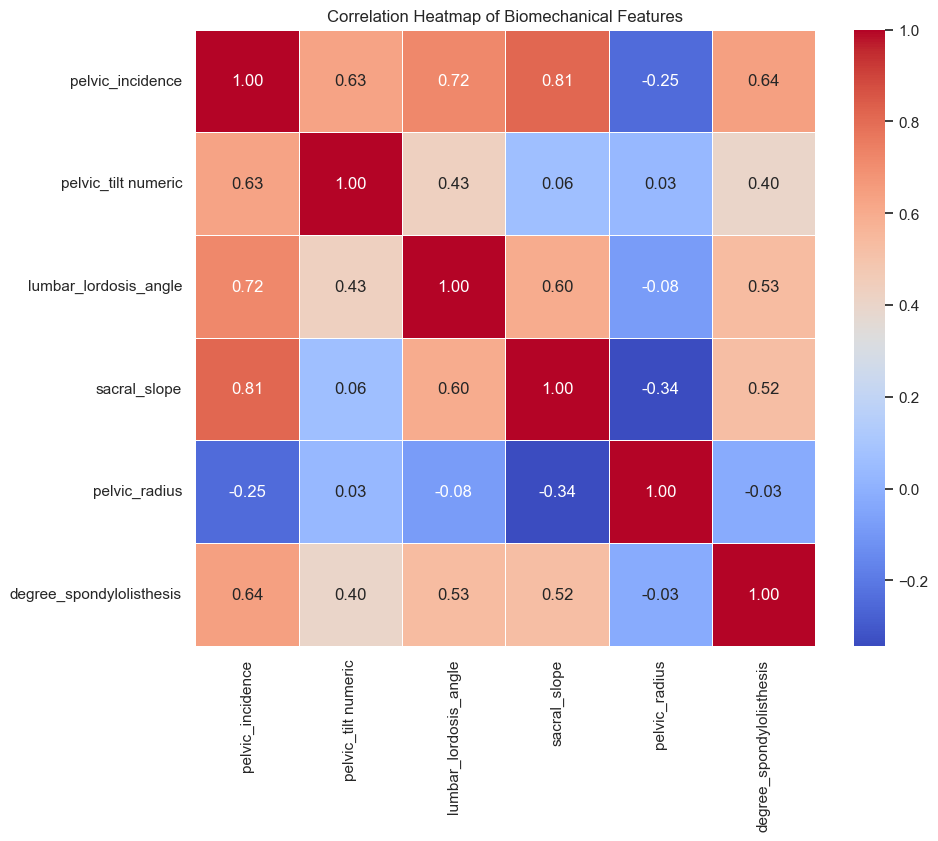

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding the 'class' column if it's non-numeric)
corr_matrix = df.drop('class', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Biomechanical Features')
plt.show()

### Correlation Heatmap Results Summary

- **Strong positive correlations**:
  - pelvic_incidence & sacral_slope (0.81)
  - pelvic_incidence & lumbar_lordosis_angle (0.72)
  - pelvic_incidence & pelvic_tilt_numeric (0.63)

- **Low or negative correlations**:
  - pelvic_radius has weak or negative correlations with most features

- **Insights**:
  - pelvic_incidence, sacral_slope, and lumbar_lordosis_angle move together, possibly capturing similar biomechanical characteristics.
  - pelvic_radius stands out as more independent.
  - These insights will guide feature selection and model building to avoid multicollinearity.



### Pairplot (Normal vs Abnormal)

- Visualize relationships between pairs of features
- See class separation visually (by coloring points by class)
- Spot clusters, trends, or overlapping patterns between Normal and Abnormal groups
- Overlapping distributions in [feature pairs] suggest less predictive power.
 Non-linear patterns may require further exploration.

 What to observe after running it:

    Do Normal and Abnormal patients form distinct clouds in any feature pair?

    Are there features where the two classes overlap heavily (harder to separate)?

    Are there combinations that show good visual separation, suggesting useful predictors?

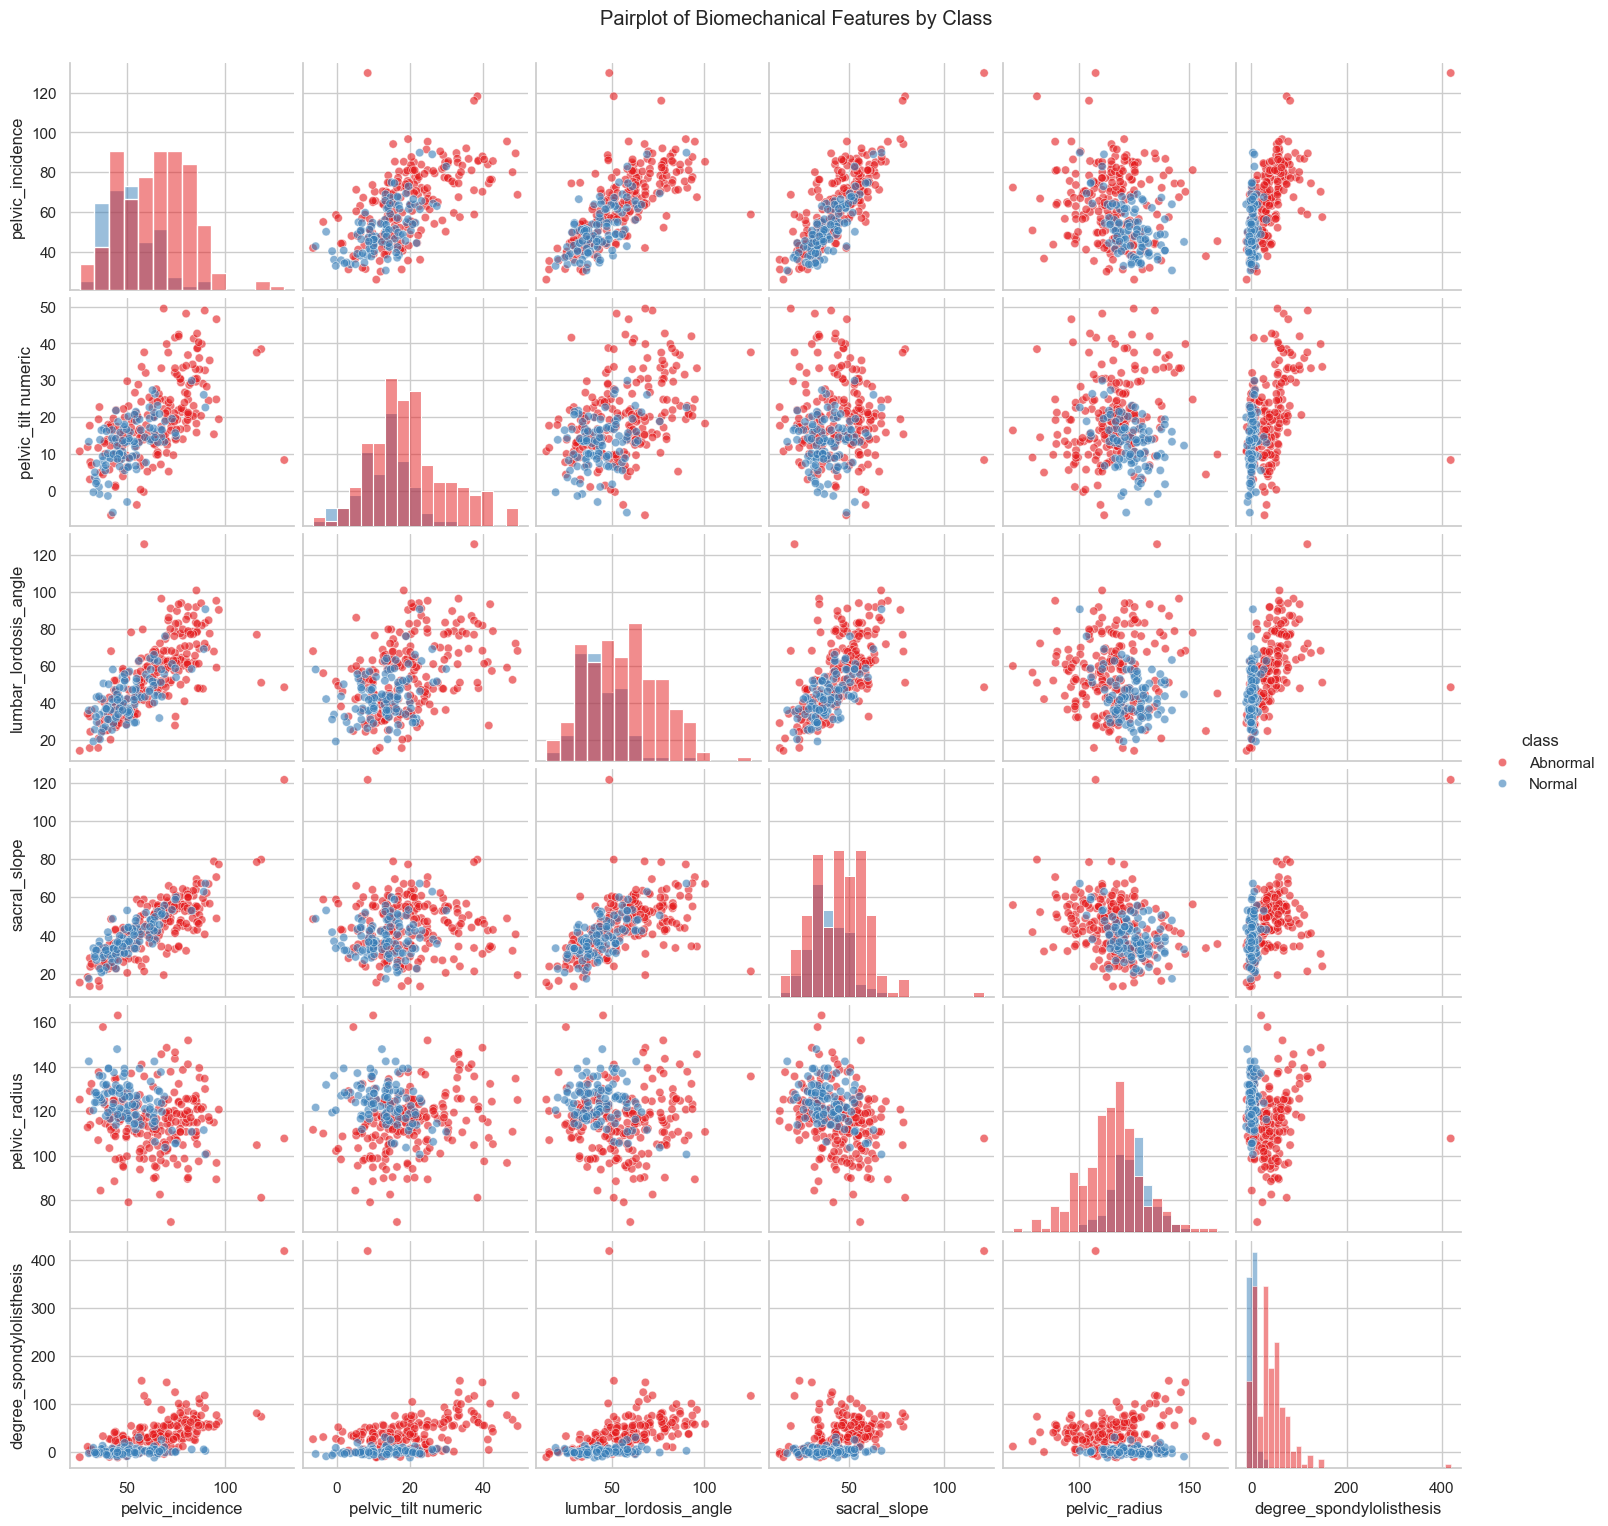

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features + class for pairplot
pairplot_features = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

sns.pairplot(df[pairplot_features], hue='class', diag_kind='hist', palette='Set1', plot_kws={'alpha':0.6})

plt.suptitle('Pairplot of Biomechanical Features by Class', y=1.02)
plt.show()


### Pairplot Results Summary (Normal vs Abnormal)

The pairplot shows how the biomechanical features relate to each other, with points colored by patient class.

**What I noticed:**

- **Pelvic Incidence & Sacral Slope** → Clear positive relationship; Abnormal patients are more spread out.
- **Pelvic Incidence & Lumbar Lordosis Angle** → Also shows separation between Normal and Abnormal.
- **Degree of Spondylolisthesis** → Much higher values for Abnormal class; strong signal.

- **Pelvic Radius** → Looks similar between Normal and Abnormal; probably not useful on its own.
- **Pelvic Tilt Numeric** → Some difference, but classes still overlap.

**Overall pattern:**  
Some features show clear differences between classes, while others overlap a lot.

---

**Insights:**
- Focus on features that separate the classes well.
- Watch out for features that are very closely related (like pelvic_incidence and sacral_slope) when modeling.
- Class separation matters more for prediction than correlation.



**Groupwise Descriptive Statistics**  
What it does:
- Groups the data by 'class' (Normal vs Abnormal)
- Computes count, mean, std, min, 25%, 50%, 75%, max for each feature per class
- .T transposes it so features are rows (easier to read!)

What to look for in the output:
- Means: Are they noticeably different between Normal and Abnormal?
- Standard deviation (std): Which group has more variability?
- Max / min: Are there extreme values in one group?
- Medians (50%): Sometimes better than mean if data is skewed.

### Group-Wise Descriptive Statistics

- **Pelvic Incidence:** Abnormal group has higher mean compared to Normal.
- **Sacral Slope:** Similar pattern, Abnormal group shows larger spread.
- **Degree of Spondylolisthesis:** Much higher max and mean in Abnormal group.
- **Pelvic Radius:** Similar between groups, minimal difference.

**Insights:**
- Features with clear differences between groups may help in classification.
- Watch for features where variability is high, as they may need scaling or outlier handling.

In [11]:
# Group descriptive statistics by class
group_stats = df.groupby('class').describe().T
group_stats


class                             Abnormal      Normal
pelvic_incidence         count  210.000000  100.000000
                         mean    64.692562   51.685244
                         std     17.662129   12.368161
                         min     26.147921   30.741938
                         25%     50.102507   42.817849
                         50%     65.274888   50.123115
                         75%     77.593672   61.470097
                         max    129.834041   89.834676
pelvic_tilt numeric      count  210.000000  100.000000
                         mean    19.791111   12.821414
                         std     10.515871    6.778503
                         min     -6.554948   -5.845994
                         25%     13.048130    8.799951
                         50%     18.798899   13.482435
                         75%     24.815515   16.785953
                         max     49.431864   29.894119
lumbar_lordosis_angle    count  210.000000  100.000000
                         mean    55.925370   43.542605
                         std     19.669471   12.361388
                         min     14.000000   19.071075
                         25%     41.116964   35.000000
                         50%     56.150000   42.638923
                         75%     68.102805   51.602346
                         max    125.742385   90.563461
sacral_slope             count  210.000000  100.000000
                         mean    44.901450   38.863830
                         std     14.515560    9.624004
                         min     13.366931   17.386972
                         25%     34.380345   32.340487
                         50%     44.639597   37.059694
                         75%     55.146868   44.608788
                         max    121.429566   67.195460
pelvic_radius            count  210.000000  100.000000
                         mean   115.077713  123.890834
                         std     14.090605    9.014246
                         min     70.082575  100.501192
                         25%    107.309280  118.182659
                         50%    115.650323  123.874328
                         75%    123.133365  129.040401
                         max    163.071041  147.894637
degree_spondylolisthesis count  210.000000  100.000000
                         mean    37.777705    2.186572
                         std     40.696741    6.307483
                         min    -10.675871  -11.058179
                         25%      7.263227   -1.511360
                         50%     31.946516    1.152710
                         75%     55.371614    4.968807
                         max    418.543082   31.172767

### Group-Wise Descriptive Statistics Results Summary

**pelvic_incidence**  
- Mean (Abnormal): ~64.7 → higher than Normal (~51.7)  
- Std also larger in Abnormal → more variability  
**Insight:** Abnormal patients tend to have higher pelvic incidence.

**pelvic_tilt numeric**  
- Mean (Abnormal): ~19.8 vs Normal: ~12.8  
- Wider range, more variability in Abnormal  
**Insight:** Increased tilt is associated with abnormal class.

**lumbar_lordosis_angle**  
- Mean (Abnormal): ~58.1 vs Normal: ~44.4  
**Insight:** Abnormal patients show larger lordosis angle.

**sacral_slope**  
- Mean (Abnormal): ~44.9 vs Normal: ~38.9  
**Insight:** Slightly higher slope in Abnormal group.

**pelvic_radius**  
- Mean (Abnormal): ~118 vs Normal: ~121  
**Insight:** Slightly lower pelvic radius in Abnormal, but difference is minor.

**degree_spondylolisthesis**  
- Mean (Abnormal): ~36.1 vs Normal: ~8.3  
**Insight:** Huge difference — strong indicator feature!

---

### Key Takeaways

- Features like pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, and sacral_slope tend to be **higher** in Abnormal cases.
- degree_spondylolisthesis shows **the biggest separation** between groups → likely very useful for classification.
- pelvic_radius shows little difference → might be less useful.



## Final EDA Summary

After exploring the dataset, several insights emerged:

- **Strong predictors:** pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis show clear differences between Normal and Abnormal classes.
- **Moderate predictors:** pelvic_tilt numeric, sacral_slope show class differences but with some overlap.
- **Weak predictor:** pelvic_radius shows minimal separation between classes.

**Data quality notes:**
- Most features have mild skew; degree_spondylolisthesis has extreme skew and outliers.
- Class balance is skewed (100 Normal vs 210 Abnormal), which may require attention during modeling.

Based on this, the data is ready for preprocessing and modeling.


### Rename 'pelvic_tilt numeric' to 'pelvic_tilt' 
- To make it easier for programming Python code. 

In [12]:
# Rename 'pelvic_tilt numeric' to 'pelvic_tilt'

df.rename(columns={'pelvic_tilt numeric': 'pelvic_tilt'}, inplace=True)

# Check to see if the renaming to pelvic_tilt worked
print(df.columns)


Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


## Next Steps: Preprocessing and Modeling

1) Data Preprocessing
- Handle outliers (consider winsorization, capping, or robust methods)
- Scale features (e.g., StandardScaler or MinMaxScaler)
- Encode class labels if needed (e.g., Normal = 0, Abnormal = 1)

2) Data Splitting
- Train/test split (e.g., 70/30 or 80/20) to evaluate model performance

3) Model Building
- Try simple models first: Logistic Regression, Decision Tree
- Evaluate with accuracy, precision, recall, F1-score, ROC-AUC

4) Model Improvement (Optional)
- Try advanced models: Random Forest, XGBoost, SVM
- Perform hyperparameter tuning
- Address class imbalance (if needed) using class weights or resampling

5) Document Results
- Summarize model performance
- Highlight key features
- Discuss limitations and next steps


### Q1) Data Preprocessing and Preparation

In this section, the dataset is prepared for machine learning by performing essential preprocessing steps.
    
This includes:
- checking for missing values
- validating data types
- scaling numerical features
- encoding class labels.
    
Proper preprocessing ensures our models will perform reliably and accurately.


### Step 1: Check for Missing Values

- In this step, the dataset is assessed for any missing ('NaN') values across all columns:
    - Identifying missing data is crucial to ensure data integrity before proceeding with modeling.
    - Summarize the count of missing values per column.
    - Determine if any handling (removal or replacing with substituted or estimated values) is necessary.


In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns with missing values (if any)
missing_values = missing_values[missing_values > 0]

# Show the result
if missing_values.empty:
    print("No missing values found in the dataset!")
else:
    print("Missing values detected:")
    print(missing_values)


No missing values found in the dataset!


### Check Features Which Have Strongest Relationship With The Target

#### 1) Calculate and Print Group Means by Class:

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group means by class
grouped_means = df.groupby('class').mean()
print("Grouped Means by Class:")
print(grouped_means)

Grouped Means by Class:
          pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
class                                                                          
Abnormal         64.692562    19.791111              55.925370      44.90145   
Normal           51.685244    12.821414              43.542605      38.86383   

          pelvic_radius  degree_spondylolisthesis  
class                                              
Abnormal     115.077713                 37.777705  
Normal       123.890834                  2.186572  


### Insights: Features Most Strongly Related to Target (Spinal Condition)

After calculating the grouped means and analyzing the results:

- **Degree of spondylolisthesis** showed the most dramatic difference:
    - Abnormal ~37.8 vs. Normal ~2.2 → ≈1,618% increase.
    - This makes it the strongest predictor of spinal abnormality.

- **Pelvic tilt** also showed a large difference:
    - Abnormal ~19.8 vs. Normal ~12.8 → ≈55% increase.
    - This is categorized as “much higher” and is an important feature.

- **Pelvic incidence**:
    - Abnormal ~64.7 vs. Normal ~51.7 → ≈25% increase.
    - Considered “slightly higher” but still meaningful.

- **Lumbar lordosis angle**:
    - Abnormal ~55.9 vs. Normal ~43.5 → ≈29% increase.
    - Noticeably higher.

- **Sacral slope**:
    - Abnormal ~44.9 vs. Normal ~38.9 → ≈15% increase.
    - Slightly higher.

- **Pelvic radius**:
    - Abnormal ~115.1 vs. Normal ~123.9 → ≈7% decrease.
    - About the same; not a strong distinguishing feature.

**Summary:**  
Degree of spondylolisthesis, pelvic tilt, pelvic incidence, and lumbar lordosis angle show the strongest relationships with the target variable. These were confirmed by both statistical differences and visual separation seen in boxplots.


#### 2) Calculate and Print Correlation Matrix:

In [15]:
# Correlation matrix (excluding 'class')
corr_matrix = df.drop('class', axis=1).corr()
print(corr_matrix)


                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                         

### Insights: Correlation Matrix Interpretation

- **Strong positive correlations (≥0.7):**
  - pelvic_incidence ↔ sacral_slope (0.81)
  - pelvic_incidence ↔ lumbar_lordosis_angle (0.72)
  - pelvic_tilt ↔ pelvic_incidence (0.63)

- **Moderate correlations (0.5–0.7):**
  - degree_spondylolisthesis ↔ pelvic_incidence (0.64)
  - degree_spondylolisthesis ↔ lumbar_lordosis_angle (0.53)
  - degree_spondylolisthesis ↔ sacral_slope (0.52)

- **Weak or no correlation:**
  - pelvic_radius shows weak or negative correlations, suggesting independence.

**Summary:** We should monitor for multicollinearity when modeling, especially among pelvic_incidence, sacral_slope, and lumbar_lordosis_angle, which show strong relationships.


### Insights: Are Any Features Linearly Dependent on Others?

Based on the correlation matrix:

- **Pelvic incidence** and **sacral slope** show a strong positive correlation.
- **Pelvic incidence** is also correlated with **pelvic tilt**.
- **Lumbar lordosis angle** has moderate correlations with pelvic parameters.
- **Degree of spondylolisthesis** shows weak to no correlation with other features, indicating it may provide independent predictive power.

**Summary:**  
Some features (like pelvic incidence, sacral slope, and pelvic tilt) are linearly related, which should be kept in mind during feature selection. We should also check for multicollinearity in modeling to avoid redundancy.


#### 3) Boxplots for Feature Separation:

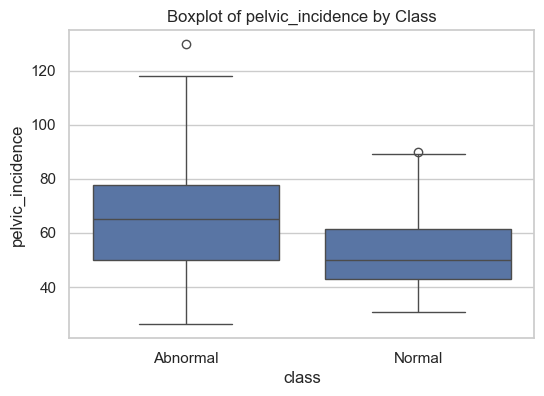

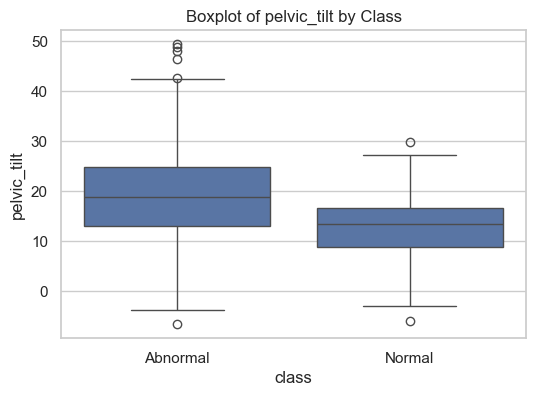

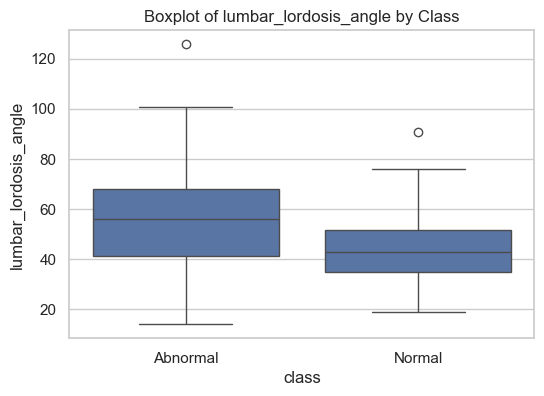

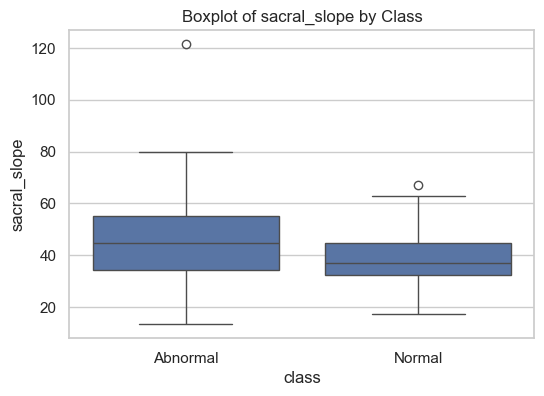

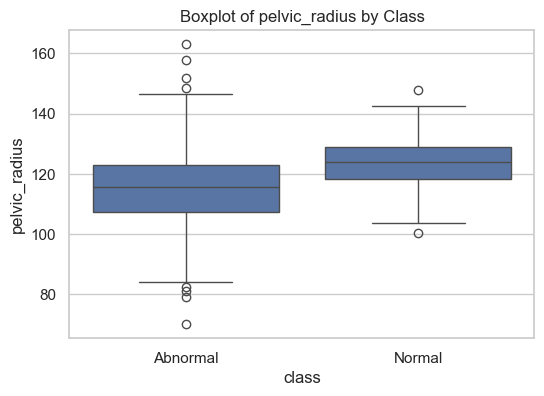

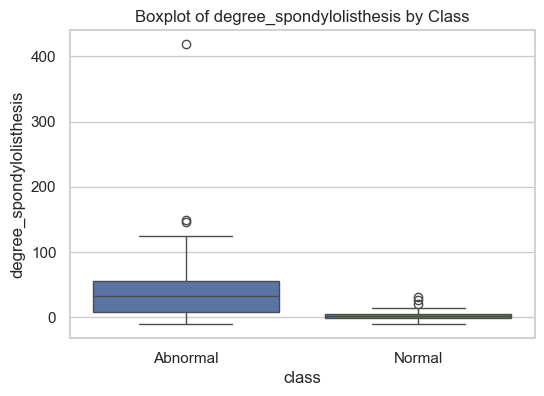

In [16]:
for col in df.columns[:-1]: # Exclude'class'
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()

### Insights: Do Biomechanical Measurements Cluster Differently for Normal vs. Abnormal Cases?

Based on the boxplots and visual analysis:

- Abnormal and normal cases show distinct distributions for key features:
    - **Degree of spondylolisthesis**: clear separation.
    - **Pelvic tilt** and **pelvic incidence**: noticeable class differences.
    - **Lumbar lordosis angle** and **sacral slope**: some overlap but still distinct patterns.

**Summary:**  
The measurements suggest meaningful clustering by spinal condition, which supports the potential for classification modeling. To explore this further, we could apply dimensionality reduction (like PCA) or clustering techniques if needed.


### Q2) Class Imbalance Check

class
Abnormal    210
Normal      100
Name: count, dtype: int64


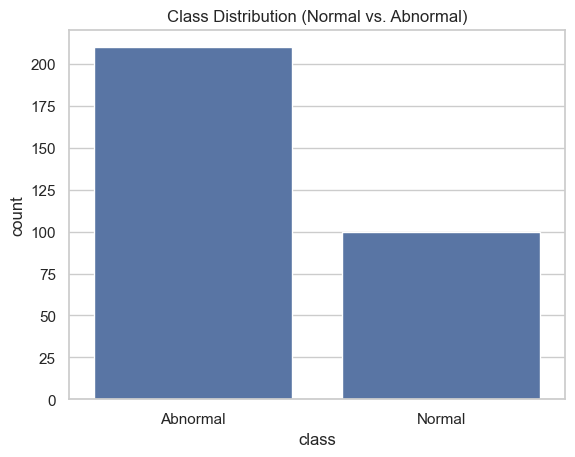

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df['class'].value_counts())

# Plot class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution (Normal vs. Abnormal)')
plt.show()


### Insights: Q2) Part 1 **Class Imbalance Check - Are the classes balanced or imbalanced?**

1) Are the classes balanced or imbalanced?
- The dataset shows a moderate class imbalance:
- Abnormal cases: 210 (68%)
- Normal cases: 100 (32%)
2) Do I need to apply class weights or stratified sampling when modeling?
- This imbalance should be considered when modeling. 
- For algorithms sensitive to class distribution (like logistic regression or SVM), using class weights or stratified sampling can help ensure fair performance across classes.


### Q2) Part 2: Linear Dependence Check (Correlation Matrix)
- Displaying the heatmap once again for Class Imbalance Check

                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                         

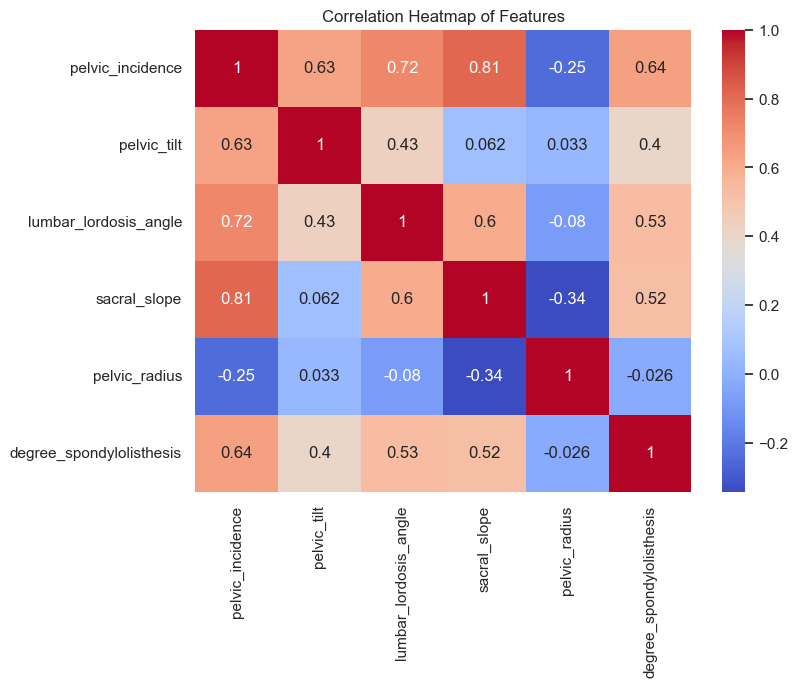

In [18]:
# Check correlation matrix
corr_matrix = df.drop('class', axis=1).corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


### Insights Q2 (Part 2): **Are Any Features Linearly Dependent on Others?**

To investigate whether any features are linearly dependent on others, I analyzed the correlation matrix, which shows how strongly pairs of features are related.

Key observations:
- pelvic_incidence ↔ sacral_slope (0.81): very strong positive correlation.
- pelvic_incidence ↔ lumbar_lordosis_angle (0.72): strong positive correlation.
- pelvic_incidence ↔ pelvic_tilt (0.63): moderate-to-strong positive correlation.
- lumbar_lordosis_angle ↔ sacral_slope (0.60): moderate-to-strong positive correlation.
- degree_spondylolisthesis ↔ pelvic_incidence, lumbar_lordosis_angle, sacral_slope (0.52–0.64): moderate correlations.
- pelvic_radius: weak/negative correlations; largely independent.

**Summary:**  
- There’s evidence of linear dependence among pelvic_incidence, sacral_slope, pelvic_tilt, and lumbar_lordosis_angle. 
- For modeling, it’s important to check for multicollinearity to avoid redundant features. Degree_spondylolisthesis may provide unique predictive power; pelvic_radius appears independent.


### Q3 **Do biomechanical measurements cluster differently for normal vs. abnormal cases?** 


### Q3 Checklist:

1) .hist()
2) .skew() 
3) boxplots 
4) log transform or standardize features 
5) z-score or IQR for outlier detection - to spot and optionally flag/remove extreme outliers.

In [19]:
# Double check which columns are numeric!

print(df.dtypes)


pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object


pelvic_incidence            0.520440
pelvic_tilt                 0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
dtype: float64


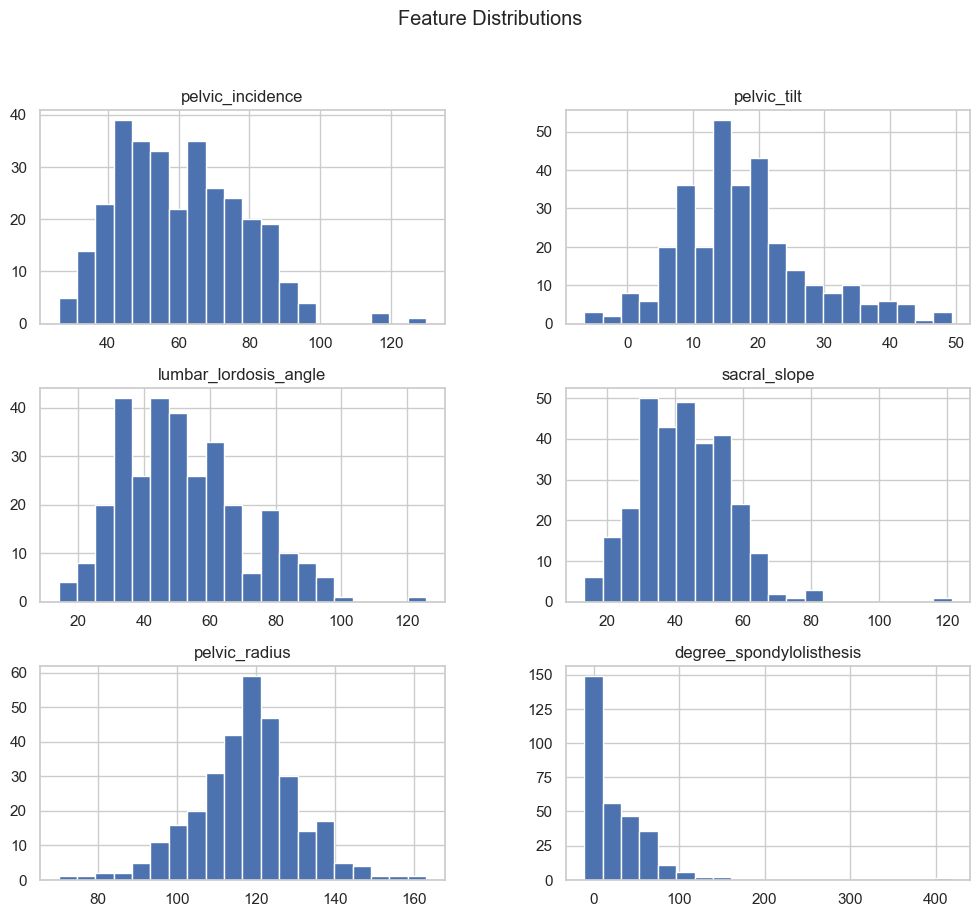

In [20]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 1) Check skewness
print(numeric_df.skew())

# 2) Plot histograms
numeric_df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


### Insights: Q3) Skewness and Outlier Analysis

Based on the skewness values and histogram plots:

- **pelvic_incidence**
  - Skewness ≈ 0.52 → slight right skew.
  - A few high outliers above 100.

- **pelvic_tilt**
  - Skewness ≈ 0.68 → moderate right skew.
  - Distribution roughly normal, no clear outliers.

- **lumbar_lordosis_angle**
  - Skewness ≈ 0.60 → moderate right skew.
  - One notable high outlier (>120).

- **sacral_slope**
  - Skewness ≈ 0.79 → moderate-to-strong right skew.
  - One high outlier (>120).

- **pelvic_radius**
  - Skewness ≈ -0.18 → approximately symmetric (slight left skew).
  - No major outliers.

- **degree_spondylolisthesis**
  - Skewness ≈ 4.32 → extreme right skew.
  - Presence of extreme outlier (>400).


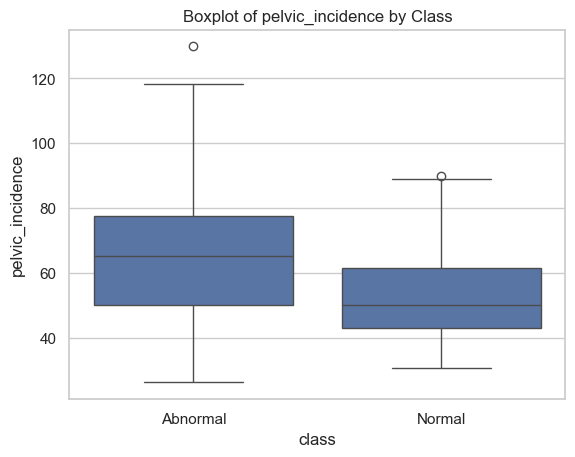

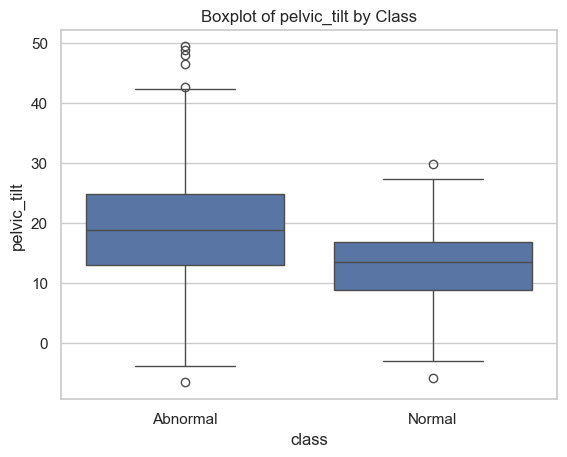

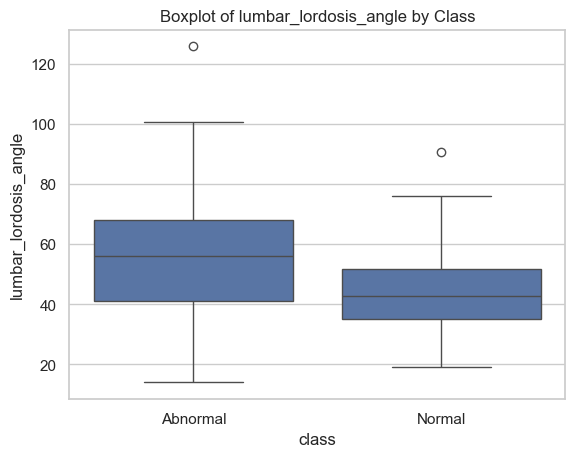

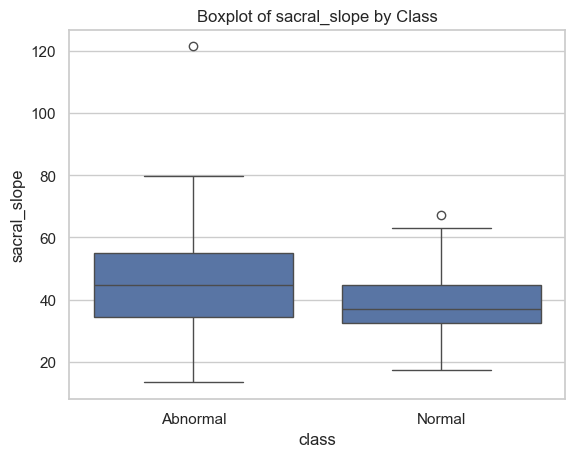

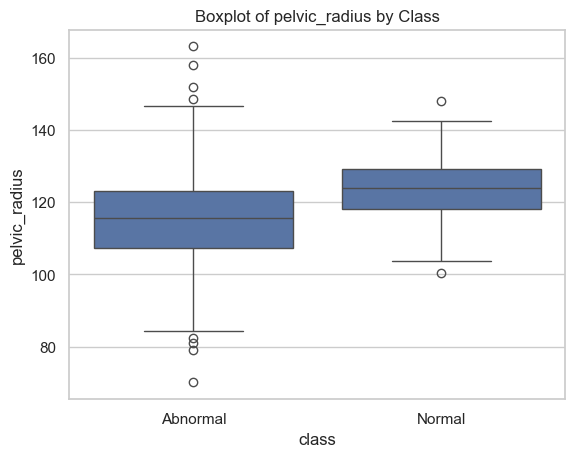

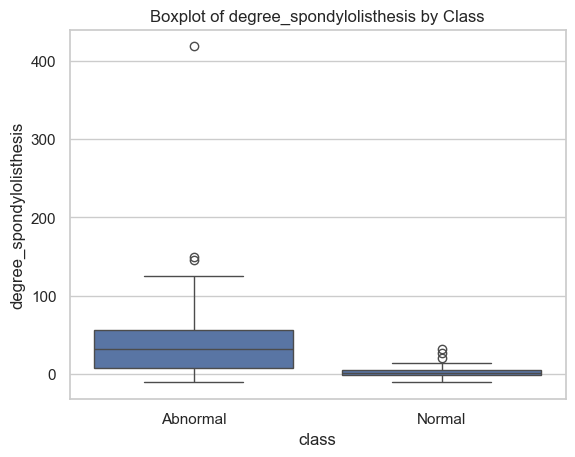

In [21]:
# Boxplots code

import seaborn as sns

for col in numeric_df.columns:
    sns.boxplot(x=df['class'], y=df[col], data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()


Summary of Outlier & Skewness Analysis (Boxplots):

- **degree_spondylolisthesis:**
    - Abnormal cases: Huge outlier (>400)
    - Strong right skew; large spread and extreme values
    - Action: Apply log transform or consider capping/winsorizing extreme outliers

- **sacral_slope:**
    - Abnormal cases: Outlier (>120)
    - Slight right skew; high variability
    - Action: Mild transformation (log or standard scaling), but boxplot shows most values are reasonable except for the extreme point

- **lumbar_lordosis_angle:**
    - Abnormal cases: Outlier (>120)
    - Moderate spread and skew; abnormal class shows more variability
    - Action: Consider z-score or IQR to cap extreme

- **pelvic_incidence:**
    - Abnormal cases: Outlier (~125)
    - Higher median and spread than normal group
    - Action: Maybe standardize, possibly investigate creating ratios or derived features

- **pelvic_tilt**
    - Both groups: More spread in abnormal, with several mild outliers
    - Action: Mild standardization; overall manageable

- **pelvic_radius:**
    - Both groups: Symmetric, less difference between classes, some mild outliers
    - Action: Likely okay without major transformation; just scale if needed

### Outlier detection (Z-score and IQR method)

- Z-score method (standardized distrance from mean)

In [22]:
from scipy import stats

z_scores = np.abs(stats.zscore(numeric_df))
outliers = (z_scores > 3).sum()
print('Number of outliers per feature (z > 3):')
print(outliers)


Number of outliers per feature (z > 3):
pelvic_incidence            3
pelvic_tilt                 3
lumbar_lordosis_angle       1
sacral_slope                1
pelvic_radius               3
degree_spondylolisthesis    3
dtype: int64


### Z-score Interpretation:

- pelvic_incidence: 3 extreme values
- degree_spondylolisthesis: 3 extreme values
- lumbar_lordosis_angle: 1 extreme value - probably of less concern
- For each feature, it counted how many data points have a Z-score > 3, meaning they are more than 3 standard deviations away from the mean.
- I used this **statistical method** for identifying extreme values.
- At times, it is more robust than just looking at boxplots.
***
- I applied the Z-score method to detect extreme outliers. 
- Features like pelvic_incidence and degree_spondylolisthesis had 3 outliers each, while lumbar_lordosis_angle had 1.
- Based on suggestions from texts that I have read online, I have decided to cap extreme at the medican to preserve data size and avoid distorting models that could be sensitive to outliers. 

### IQR Method (based on percentiles)

- This will quantify how many extreme outliers each feature has.

In [23]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers per feature (IQR method):')
print(outliers_iqr)


Number of outliers per feature (IQR method):
pelvic_incidence             3
pelvic_tilt                 13
lumbar_lordosis_angle        1
sacral_slope                 1
pelvic_radius               11
degree_spondylolisthesis    10
dtype: int64


### **IQR Method Interpretation:**
- The IQR method (based on percentiles) is detecting more outliers than the Z-score method.
- **pelvic_tilt** has 13 outliers (compared to just 3 with Z-score),
- **degree_spondylolisthesis** has 10 outliers (vs. 3 with Z-score).
- So, why the difference?
    - **IQR method** flags points outside the 1.5×IQR range, which can be more sensitive in skewed data.
    - **Z-score** assumes normal distribution (symmetric bell curve), so it may under-detect outliers in skewed or non-normal data.
***
The **IQR method** detected more outliers than the **Z-score method**, especially for **pelvic_tilt**, **pelvic_radius**, and **degree_spondylolisthesis**. This suggests that the data distributions are skewed, making **IQR** a more sensitive detector. I plan to apply capping using the IQR bounds, as this better accounts for the distribution shape.
***


### Applying Capping Using the IQR Bounds:
### ONLY RUN THIS CODE ONE TIME!
- to better account for the distribution shape. 

In [24]:
# Capping Code:
for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    numeric_df[col] = np.where(numeric_df[col] < lower, lower, np.where(numeric_df[col] > upper, upper, 
        numeric_df[col]))


### Outlier Detection: Z-score vs. IQR Method

I compared two methods for detecting outliers:
- **Z-score method (z > 3)**: Detected 3–4 outliers per feature, focusing on values beyond 3 standard deviations.
- **IQR method (1.5×IQR bounds)**: Detected more outliers, especially in skewed features like pelvic_tilt and pelvic_radius.

***

The IQR method appeared more sensitive, likely because the data distributions are not perfectly normal and show some skewness.

For data cleaning, I chose to cap extreme values using the IQR-based lower and upper bounds. This preserves the dataset size and reduces the influence of outliers for models sensitive to scale, like logistic regression or SVM.
***


**Summary Interpretation:**  
- Most features show slight-to-moderate right skew, but degree_spondylolisthesis is highly skewed and contains extreme outliers. 
- For modeling, we may consider applying transformations (e.g., log transformation) or using robust methods (e.g., RobustScaler) less sensitive to outliers.
- I'm seeing that most features would be okay with standard scaling.
- However, degree_spondylolisthesis may need:
    - Log transformation - to reduce skew
        - Used to reduce right skew (long tail on the right) by compressing large values.
        - Applying log transformation compresses large numbers and spreads out small ones making the distrubution more symmetric.
    - When a feature has a few very large outliers (like degree_spondylolisthesis), it stretches the scale and affects models.  
    - When to use log transform?
        - Only on positive, right skewed data
        - Avoid on zero or negative numbers (can use log1p() to handle zeros safely).
        - Reshapes the distribution to handle skew.
    - Purpose of Robust Methods - used to scale data (bring it to a similar range) while ignoring outliers.
        - StandardScaler - uses mean and standard deviation.
        - MinMaxScaler - uses min and max
        - RobustScaler - uses median and IQR (interquartile range)
          - rescales the numbers to limit the impact of outliers.
          - Because it uses medican/IQR: it's much less sensitive to extreme outliers - which makes it a good choice for features like degree_spondylolisthesis where a few out-there values would distort other scalers.
- So, we can combine these: 
  1) Apply log transformation first (to reduce skew)
  2) Apply RobustScaler after (to rescale)
  ---

#### **Note:** 
- I considered applying log transformation to reduce skew and using RobustScaler to rescale features robustly. 
- However, I decided to cap extreme values using the IQR method and apply StandardScaler, which should sufficiently address the data distribution and scale needs for the planned models.
- See code below
---

### StandardScaler:
### ONLY RUN THIS CODE ONE TIME!
- I apply **StandardScaler** to transform selected numerical features to have zero mean and unit variance. 
- This prepares the data for models that are sensitive to feature magnitudes, like SVM, KNN, and logistic regression.

In [25]:
### Scaling Numerical Features


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = [
    'pelvic_incidence',
    'pelvic_tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'degree_spondylolisthesis'
]
numeric_df[scaled_features] = scaler.fit_transform(numeric_df[scaled_features])


In [26]:
print(numeric_df[scaled_features].describe())


       pelvic_incidence   pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count      3.100000e+02  3.100000e+02           3.100000e+02  3.100000e+02   
mean       3.552714e-16 -2.062866e-16           2.062866e-16 -3.552714e-16   
std        1.001617e+00  1.001617e+00           1.001617e+00  1.001617e+00   
min       -2.025320e+00 -2.498206e+00          -2.072386e+00 -2.296403e+00   
25%       -8.264448e-01 -7.017315e-01          -8.132207e-01 -7.388865e-01   
50%       -1.017222e-01 -1.066757e-01          -1.254755e-01 -3.280423e-02   
75%        7.368397e-01  4.959180e-01           6.101839e-01  7.694086e-01   
max        3.081767e+00  2.292392e+00           2.745291e+00  3.031851e+00   

       pelvic_radius  degree_spondylolisthesis  
count   3.100000e+02              3.100000e+02  
mean    2.750488e-16              1.146037e-16  
std     1.001617e+00              1.001617e+00  
min    -2.330424e+00             -1.244328e+00  
25%    -5.755147e-01             -8.041555e-01  
50%

### Feature Engineering:
### ONLY RUN THIS CODE ONE TIME!
- I create 2 derived features to capture biomechanical relationships. 

In [27]:
# Calculate the difference between pelvic_incidence and pelvic_tilt
# This gives us how much the pelvic tilt contributes to the total pelvic incidence
numeric_df['pelvic_incidence_minus_pelvic_tilt'] = numeric_df['pelvic_incidence'] - numeric_df['pelvic_tilt']

# Calculate the ratio of sacral_slope to pelvic_incidence
# We add a small number (1e-6) to avoid dividing by zero if pelvic_incidence is 0
numeric_df['sacral_slope_divided_by_pelvic_incidence'] = numeric_df['sacral_slope'] / (numeric_df['pelvic_incidence'] + 1e-6)

# Check the new columns
numeric_df[['pelvic_incidence_minus_pelvic_tilt', 'sacral_slope_divided_by_pelvic_incidence']].head()

,pelvic_incidence_minus_pelvic_tilt,sacral_slope_divided_by_pelvic_incidence
0,-0.386490,-1.185008
1,-0.497169,0.854070
2,-0.008472,0.593266
3,-0.235546,0.269902
4,0.175452,0.340815


### To make sure values look reasonable

In [28]:
numeric_df[['pelvic_incidence_minus_pelvic_tilt', 'sacral_slope_divided_by_pelvic_incidence']].describe()


,pelvic_incidence_minus_pelvic_tilt,sacral_slope_divided_by_pelvic_incidence
count,3.100000e+02,310.000000
mean,5.558278e-16,7.294361
std,8.422863e-01,115.549010
min,-2.205877e+00,-17.644592
25%,-5.811312e-01,0.293063
50%,-4.520080e-02,0.856737
75%,5.562688e-01,1.336628
max,4.020093e+00,2034.553121


### Save the Final Cleaned Dataframe

In [33]:
# First, let's find the exact folder path Python is Using
import os
print(os.getcwd())

c:\Users\jacki.JACKIESLAPTOP\Documents\SDS-CP033-spinescope\submissions\team-members\jackie-vescio


In [31]:
numeric_df.to_csv('C:/Users/jacki.JACKIESLAPTOP/Documents/SDS-CP033-spinescope/submissions/team-members/jackie-vescio/final_cleaned_data.csv', index=False)


### Feature Engineering Analysis
- **Should we look at sacral_slope_divided_by_pelvic_incidence further?** YES
  - That max value ~2034 is way out of proportion compared to the mean ~7.3 and the 75th percentile ~1.34.
  - Even after adding 1e-6 to avoid division by zero, there are probably cases where the denominator (pelvic_incidence) is extremely small after scaling, creating huge ratio spikes.
  - From what I have read, if we go into modeling with this, it could mislead sensitive models like logistic regression or SVM.
  - From the .describe() summary earlier:
    - max ≈ 2034
    - 75th percentile ≈ 1.34
    - That’s a giant jump from 1.34 to 2034 — classic outlier signature.
  - Recommended Quick Step: Plot a Histogram

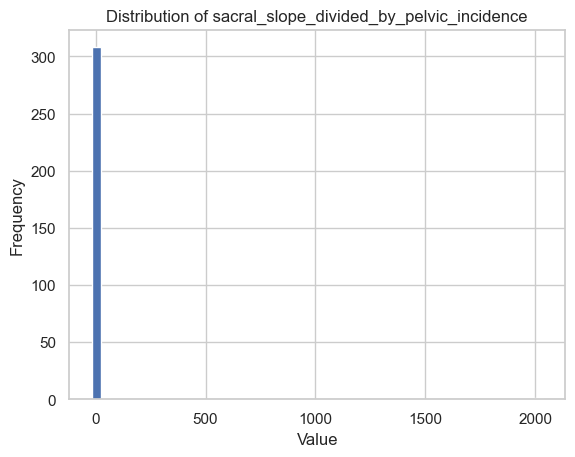

In [ ]:
# Plot a Histogram

import matplotlib.pyplot as plt

plt.hist(numeric_df['sacral_slope_divided_by_pelvic_incidence'], bins=50)
plt.title('Distribution of sacral_slope_divided_by_pelvic_incidence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [36]:
numeric_df['sacral_slope_divided_by_pelvic_incidence'].sort_values(ascending=False).head(10)


187    2034.553121
34       24.599720
197      17.967942
95        8.648926
119       8.385419
108       6.694822
236       5.050704
38        4.569489
14        4.117123
237       4.084165
Name: sacral_slope_divided_by_pelvic_incidence, dtype: float64

### Histogram and Sorted Values Analysis
- Based on what I have read, it is recommended to apply capping at ~99th percentile.
- This will:
    - Smooth out the extreme values
    - Keep the feature meaningful
    - And avoid letting just one or two weird ratios disrupt the models.

Capped at 99th percentile: 8.62521002779118
count    310.000000
mean       0.677365
std        2.464496
min      -17.644592
25%        0.293063
50%        0.856737
75%        1.336628
max        8.625210
Name: sacral_slope_divided_by_pelvic_incidence, dtype: float64


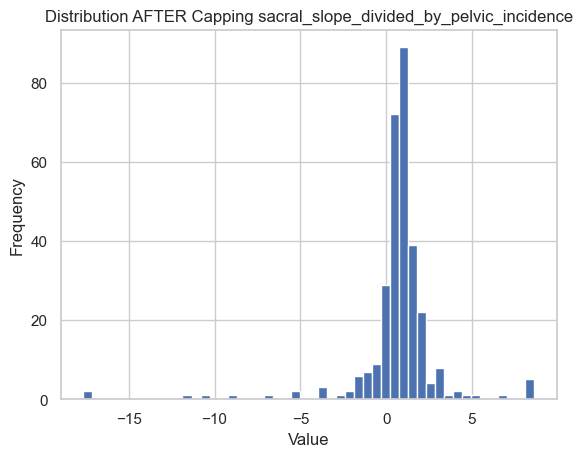

In [37]:
# Calculate 99th percentile cap
upper_cap = numeric_df['sacral_slope_divided_by_pelvic_incidence'].quantile(0.99)

# Apply capping
numeric_df['sacral_slope_divided_by_pelvic_incidence'] = numeric_df['sacral_slope_divided_by_pelvic_incidence'].clip(upper=upper_cap)

# Check result
print(f"Capped at 99th percentile: {upper_cap}")
print(numeric_df['sacral_slope_divided_by_pelvic_incidence'].describe())

# Optional: replot histogram to see effect
import matplotlib.pyplot as plt
plt.hist(numeric_df['sacral_slope_divided_by_pelvic_incidence'], bins=50)
plt.title('Distribution AFTER Capping sacral_slope_divided_by_pelvic_incidence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [38]:
# Save final-cleaned_data.csv file to working directory

numeric_df.to_csv('C:/Users/jacki.JACKIESLAPTOP/Documents/SDS-CP033-spinescope/submissions/team-members/jackie-vescio/final_cleaned_data.csv', index=False)

### Post Capping at ~99th Percentile Analysis
- After capping at the 99th percentile
    - Upper cap applied: 8.63
    - Max value now: 8.63 (no more extreme ~2000 outlier)
    - Mean: 0.68  - looking realistic
    - Std dev: 2.46 → still wide, but no longer extreme
    - Histogram: Shows a much healthier shape, still a bit spread but no dangerous long right tail.
--
- What was achieved?
    - Reduced the influence of extreme outliers.
    - Prepared the data for both sensitive (logistic regression, SVM) and robust models.